Normal Distribution

PMF, PDF, CDF, NORMAL DISTRIBUTION, SKEWNE

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc = 50, scale = 5, size = 1000)

In [22]:
sample.mean()

49.84115554692388

(array([ 1.,  3.,  4.,  4., 11., 14., 12., 16., 22., 32., 43., 58., 56.,
        65., 70., 77., 69., 77., 63., 65., 59., 49., 39., 29., 20., 11.,
        16.,  6.,  3.,  6.]),
 array([34.24618211, 35.21364243, 36.18110276, 37.14856308, 38.1160234 ,
        39.08348372, 40.05094404, 41.01840436, 41.98586469, 42.95332501,
        43.92078533, 44.88824565, 45.85570597, 46.82316629, 47.79062661,
        48.75808694, 49.72554726, 50.69300758, 51.6604679 , 52.62792822,
        53.59538854, 54.56284886, 55.53030919, 56.49776951, 57.46522983,
        58.43269015, 59.40015047, 60.36761079, 61.33507112, 62.30253144,
        63.26999176]),
 <BarContainer object of 30 artists>)

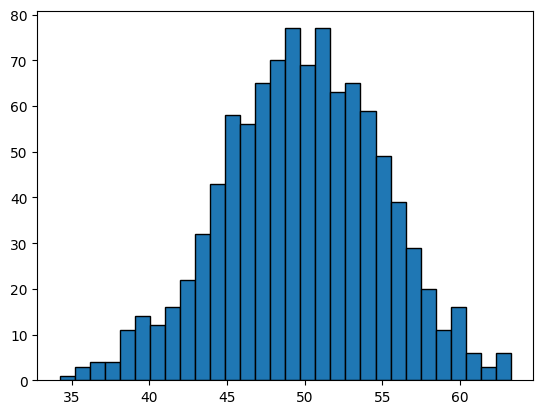

In [23]:
plt.hist(sample, bins = 30, edgecolor = 'black')

In [24]:
sample_mean = sample.mean()
sample_std = sample.std()
sample_std

5.0769258473785275

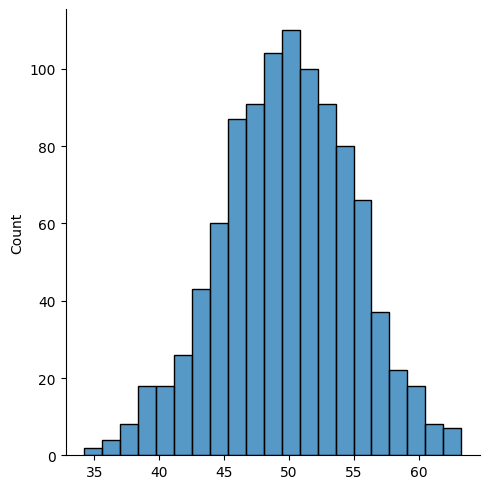

In [25]:
import seaborn as sns
sns.displot(sample)

In [18]:
sample1 = normal(loc = 50, scale = 5, size = 1000)
sample2 = normal(loc = 50, scale = 5, size = 1000)
sample = np.hstack((sample1, sample2))

In [19]:
sample

array([56.43032783, 50.76525846, 43.93121165, ..., 43.02638192,
       56.18895568, 52.82440376])

<Axes: ylabel='Density'>

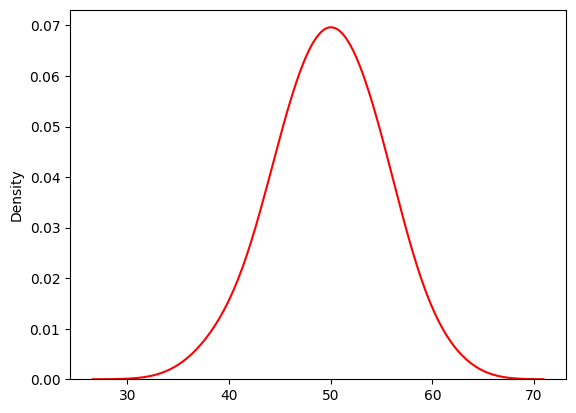

In [26]:
sns.kdeplot(sample.reshape(1000), color = 'red', bw_adjust=2)

Normal Distribution => Gaussian Distribution


In [31]:
import pandas as pd

In [34]:
titanic = pd.read_csv('test.csv')

<Axes: xlabel='Age', ylabel='Density'>

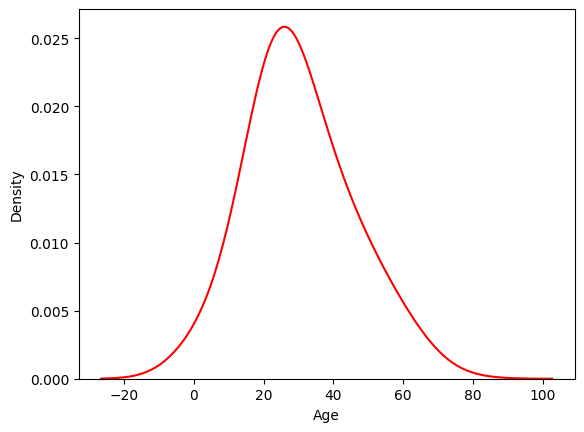

In [35]:
sns.kdeplot(titanic['Age'], color = 'red', bw_adjust=2)

In [36]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: ylabel='Density'>

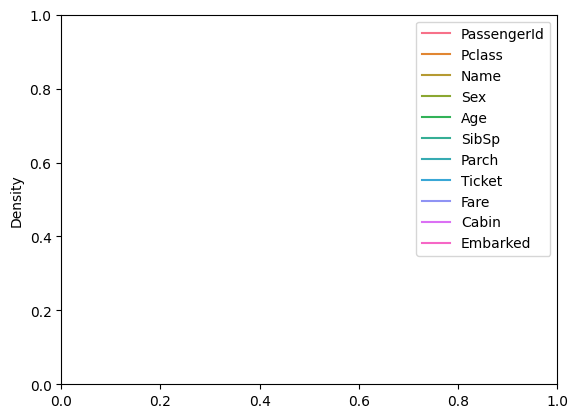

In [37]:
# kdeplot between male and female

sns.kdeplot(titanic[titanic == 'Male'], color = 'red', bw_adjust=2) 

In [ ]:
# for a normal distribution X~(u, std) what percentage of the population lies between mean 1 standard deviation, 2 std and 3 std?

In [2]:
%%HTML
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Normal Distribution Calculator</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
        }
        h1 {
            text-align: center;
        }
        form {
            max-width: 400px;
            margin: 0 auto;
        }
        input[type="number"] {
            width: 100%;
            padding: 10px;
            margin: 5px 0;
            box-sizing: border-box;
        }
        input[type="submit"] {
            width: 100%;
            padding: 10px;
            margin: 10px 0;
            box-sizing: border-box;
            background-color: #4CAF50;
            color: white;
            border: none;
            cursor: pointer;
        }
        .result {
            text-align: center;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <h1>Normal Distribution Calculator</h1>
    <form id="normalForm">
        <label for="mean">Mean:</label>
        <input type="number" id="mean" name="mean" required step="any">
        <label for="stdDev">Standard Deviation:</label>
        <input type="number" id="stdDev" name="stdDev" required step="any">
        <input type="submit" value="Calculate">
    </form>
    <div class="result" id="result"></div>

    <script>
        document.getElementById('normalForm').addEventListener('submit', function(event) {
            event.preventDefault();
            var mean = parseFloat(document.getElementById('mean').value);
            var stdDev = parseFloat(document.getElementById('stdDev').value);

            // Calculate probabilities
            var prob_within_1_std = cumulativeProbability(mean + stdDev, mean, stdDev) - cumulativeProbability(mean - stdDev, mean, stdDev);
            var prob_within_2_std = cumulativeProbability(mean + 2 * stdDev, mean, stdDev) - cumulativeProbability(mean - 2 * stdDev, mean, stdDev);
            var prob_within_3_std = cumulativeProbability(mean + 3 * stdDev, mean, stdDev) - cumulativeProbability(mean - 3 * stdDev, mean, stdDev);

            // Convert probabilities to percentages
            var percentage_within_1_std = (prob_within_1_std * 100).toFixed(2);
            var percentage_within_2_std = (prob_within_2_std * 100).toFixed(2);
            var percentage_within_3_std = (prob_within_3_std * 100).toFixed(2);

            // Display results
            document.getElementById('result').innerHTML = `
                <p>Percentage within 1 standard deviation: ${percentage_within_1_std}%</p>
                <p>Percentage within 2 standard deviations: ${percentage_within_2_std}%</p>
                <p>Percentage within 3 standard deviations: ${percentage_within_3_std}%</p>
            `;
        });

        // Function to calculate cumulative probability using the error function
        function cumulativeProbability(x, mean, stdDev) {
            return 0.5 * (1 + erf((x - mean) / (stdDev * Math.sqrt(2))));
        }

        // Error function implementation (approximation)
        function erf(x) {
            // constants
            var a1 = 0.254829592;
            var a2 = -0.284496736;
            var a3 = 1.421413741;
            var a4 = -1.453152027;
            var a5 = 1.061405429;
            var p = 0.3275911;

            // Save the sign of x
            var sign = (x >= 0) ? 1 : -1;
            x = Math.abs(x);

            // A&S formula 7.1.26
            var t = 1.0 / (1.0 + p * x);
            var y = 1.0 - (((((a5 * t + a4) * t) + a3) * t + a2) * t + a1) * t * Math.exp(-x * x);

            return sign * y;
        }
    </script>
</body>
</html>


In [ ]:
# palero distribution

CLT on Unifrom distribution

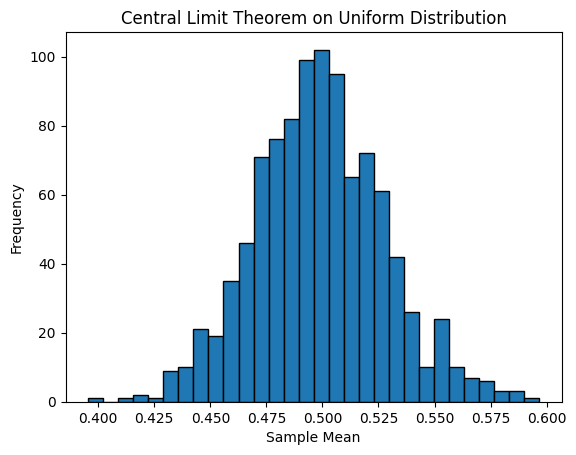

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0 
b = 1  

# Number of samples to generate
num_samples = 1000

# Number of samples to take for each sample mean calculation
sample_size = 100

# Generate multiple samples from the uniform distribution
samples = np.random.uniform(a, b, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Central Limit Theorem on Uniform Distribution')
plt.show()


Text(0.5, 1.0, 'Histogram of Sample Means')

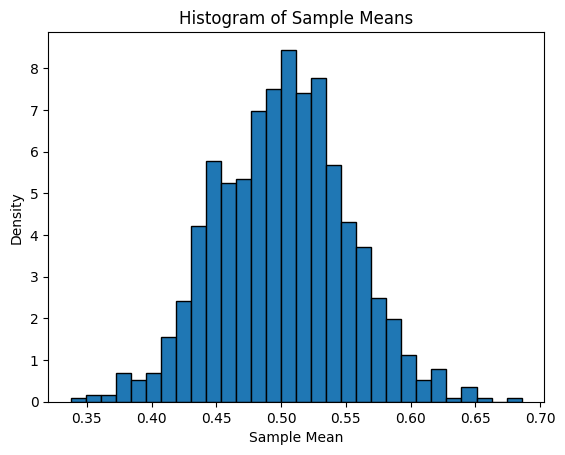

In [9]:
num_samples = 1000
sample_size = 30
distribution_range = (0, 1)

# Generate samples from the uniform distribution
samples = np.random.uniform(distribution_range[0],distribution_range[1], size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of sample means
plt.hist(sample_means, bins=30,density=True, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Histogram of Sample Means')

Text(0.5, 1.0, 'Histogram of Sample Means (Exponential Distribution)')

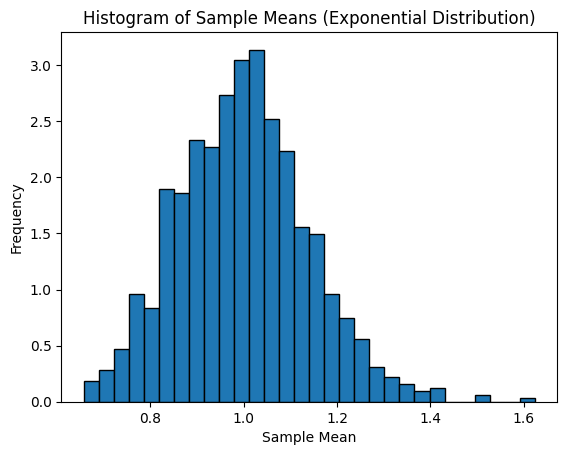

In [12]:
num_samples = 1000
sample_size = 50
lambda_param = 1

samples = np.random.exponential(1/lambda_param, size=(num_samples, sample_size))

sample_means = np.mean(samples, axis=1)

plt.hist(sample_means, bins=30,density=True, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means (Exponential Distribution)')

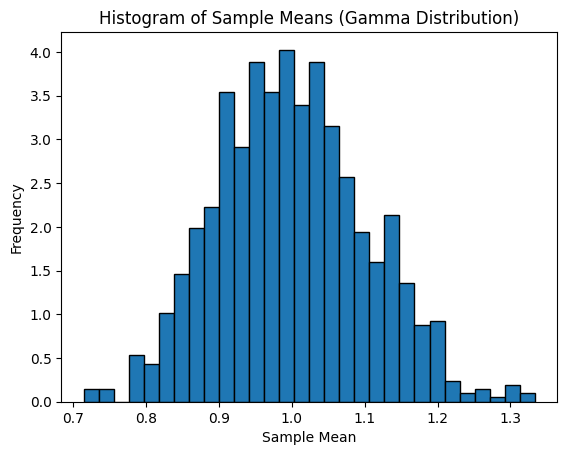

In [13]:
# gaama distribution

num_samples = 1000
sample_size = 50
alpha = 2
beta = 2

samples = np.random.gamma(alpha, 1/beta, size=(num_samples, sample_size))

sample_means = np.mean(samples, axis=1)

plt.hist(sample_means, bins=30,density=True, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means (Gamma Distribution)')
plt.show()

In [14]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [16]:
df = pd.concat([train_df[['Survived']], test_df]).sample(1309)
df

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,1254.0,2.0,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0.0,0.0,CA 31352,21.0,NaN,S
809,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
338,NaN,1230.0,2.0,"Denbury, Mr. Herbert",male,25.0,0.0,0.0,C.A. 31029,31.5,NaN,S
422,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Density'>

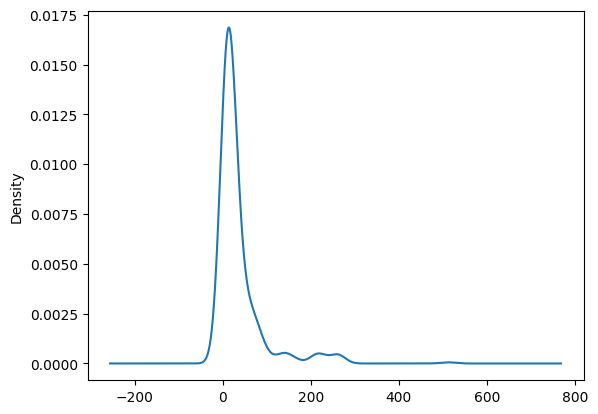

In [17]:
df['Fare'].plot(kind='kde')

In [19]:
samples = []
stds = []
for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.mean())

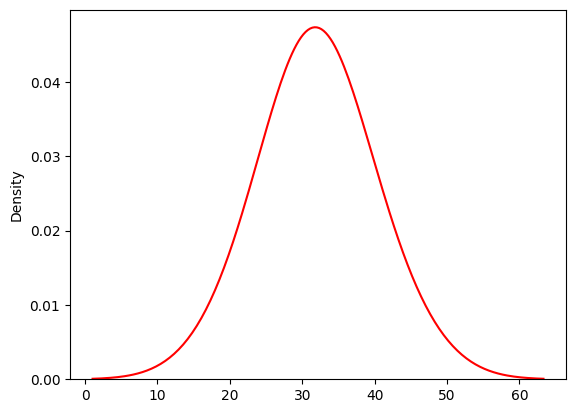

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(samples, color='red', bw_adjust=2)
plt.show()

In [1]:
x = [1,2,3,4,5]
y = x[2:4]
y

[3, 4]

In [2]:
d = {
    "john": 40,
    "peter": 45
}

len(d)  

2